## Exercise 07: Radial basis function networks

Group Name: Alwaysonline

    Omar	Sherif
    Omar	Roushdy
    Hsiwei	Kao
    Changbin	Lu
    Zhanwang	Chen

# H7.1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x=np.zeros((120,2))
for i in range(60):
    r=np.random.rand()
    if(r>0.5):
        x[i] = np.random.multivariate_normal([0,1],0.1* np.identity(2))
    else:
        x[i] = np.random.multivariate_normal([1,0],0.1* np.identity(2))
for i in range(60,120):
    r=np.random.rand()
    if(r>0.5):
        x[i] = np.random.multivariate_normal([0,0],0.1* np.identity(2))
    else:
        x[i] = np.random.multivariate_normal([1,1],0.1*np.identity(2))        
        
plt.scatter(x[:60,0],x[:60,1],c='red')
plt.scatter(x[60:,0],x[60:,1],c='blue')

# H7.2 

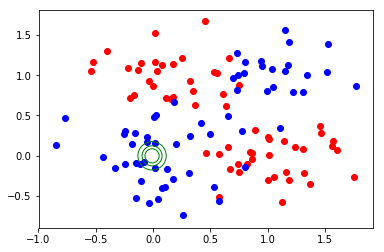

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt
X = x
y = np.concatenate(([0]*60,[1]*60),axis=0)

query_x = np.random.normal([0,0],0.01,size=[1,2])
distances = []
for index,i in enumerate(X):
    dis = np.linalg.norm(i-query_x)
    distances.append([index,dis])

distances.sort(key=lambda tup: tup[1])
plt.scatter(x[:60,0],x[:60,1],c='red')
plt.scatter(x[60:,0],x[60:,1],c='blue')
plt.scatter(query_x[0,0],query_x[0,1],s=200, facecolors='none', edgecolors='g')
plt.scatter(query_x[0,0],query_x[0,1],s=400, facecolors='none', edgecolors='g')
plt.scatter(query_x[0,0],query_x[0,1],s=800, facecolors='none', edgecolors='g')

In [11]:
X[112]

array([-0.07977167, -0.07770655])

# H7.3

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import matplotlib.pyplot as plt
X = np.concatenate((x0,x1),axis=0)
y = np.concatenate(([0]*60,[1]*60),axis=0)

query_x = np.random.normal([0,0],0.01,size=[1,2])
distances = []
for index,i in enumerate(X):
    dis = np.linalg.norm(i-query_x)
    distances.append([index,dis])

distances.sort(key=lambda tup: tup[1])
plt.scatter(x0[:,0],x0[:,1],c='red')
plt.scatter(x1[:,0],x1[:,1],c='blue')
# plt.Circle((X[distances[0][0]][0],X[distances[0][0]][1]),distances[0][1],color='r')

0.68370336085590921

### H7.3 (b) 
(1 point) Rerun kNN and Parzen-window classification after adding 60 more data points from
a third class centered on µ3
= (0.5, 0.5)>with variance σ˜
2 = 0.05. Plot the classification
boundaries as above and compare them with your previous results.

In [2]:
def parzen(x, variance=0.01):
    distances = np.sum((train_x - x)**2, axis=1)
    weights = np.exp(- distances / (2. * variance))    
    if np.mean(weights * train_t) >= 0:
        return 1
    else:
        return -1 

after adding 60 more data points from
a third class centered on µ3= (0.5, 0.5)

In [4]:
train_x = np.zeros((120, 2))
for i, coin in enumerate(np.random.rand(60)):
    if coin < 0.5:
        train_x[i] = np.random.multivariate_normal([0, 1], 0.1 * np.identity(2))
    else:
        train_x[i] = np.random.multivariate_normal([1, 0], 0.1 * np.identity(2))
        
for i, coin in enumerate(np.random.rand(60)):
    if coin < 0.5:
        train_x[60+i] = np.random.multivariate_normal([0, 0], 0.1 * np.identity(2))
    else:
        train_x[60+i] = np.random.multivariate_normal([1, 1], 0.1 * np.identity(2))
        
train_t = np.zeros(120)
train_t[:60] = -1
train_t[60:120] = 1


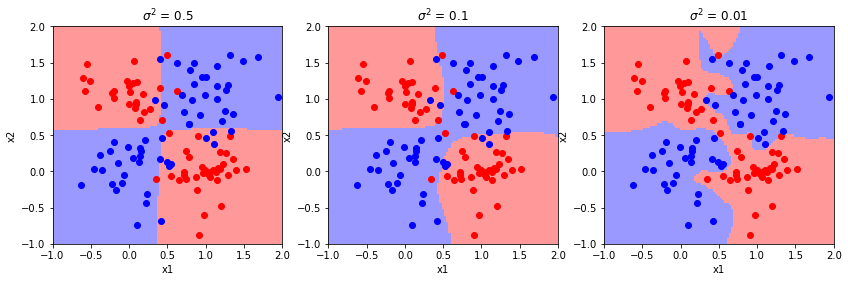

In [5]:
num_points = 100

plt.figure(figsize=(14, 4))

for subplot, variance in enumerate([0.5, 0.1, 0.01]):
    xx, yy = np.meshgrid(np.linspace(-1, 2, num_points), np.linspace(-1, 2, num_points))
    pred_t = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(num_points):
            pred_t[i, j] = parzen([xx[i, j], yy[i, j]], variance)
                
    plt.subplot(1, 3, 1+subplot)
    plt.title('$\sigma^2$ = {}'.format(variance))
    
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list('rb', [[1., 0.6, 0.6], [0.6, 0.6, 1.]], 2)
    plt.pcolor(xx, yy, pred_t, cmap=cmap)

    plt.scatter(train_x[:60, 0], train_x[:60, 1], c='r', label='t = -1')
    plt.scatter(train_x[60:, 0], train_x[60:, 1], c='b', label='t = 1')
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.xlim(-1, 2)
    plt.ylim(-1, 2)

In [6]:
def parzen(x, variance=0.01):
    distances = np.sum((train_x - x)**2, axis=1)
    weights = np.exp(- distances / (2. * variance))    
    if np.mean(weights * train_t) >= 0:
        return 1
    else:
        return -1 

In [7]:
train_x = np.zeros((120+60, 2))
for i, coin in enumerate(np.random.rand(60)):
    if coin < 0.5:
        train_x[i] = np.random.multivariate_normal([0, 1], 0.1 * np.identity(2))
    else:
        train_x[i] = np.random.multivariate_normal([1, 0], 0.1 * np.identity(2))
        
for i, coin in enumerate(np.random.rand(60)):
    if coin < 0.5:
        train_x[60+i] = np.random.multivariate_normal([0, 0], 0.1 * np.identity(2))
    else:
        train_x[60+i] = np.random.multivariate_normal([1, 1], 0.1 * np.identity(2))
        

for i in range(60):
    train_x[120+i] = np.random.multivariate_normal([0.5, 0.5], 0.05 * np.identity(2))

train_t = np.zeros(120+60)
train_t[:60] = -1
train_t[60:120] = 1
train_t[120:] = 2

3367
3420
3213
4399
4310
1291
4831
4414
755


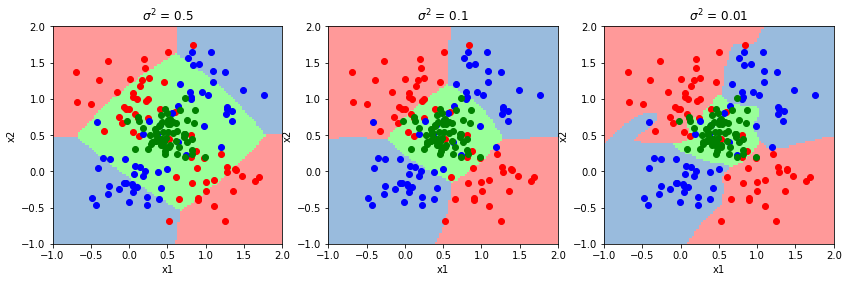

In [8]:
def parzen(x, variance=0.01):
    distances = np.sum((train_x - x)**2, axis=1)
    weights = np.exp(- distances / (2. * variance))
    #print(type(weights))
    #print(weights.shape)

    c1 = np.mean(weights[:60])
    c2 = np.mean(weights[60:120] )
    c3 = np.mean(weights[120:])
    if  c1>= c2 and c1>=c3:
        return -1
    if  c2>= c1 and c2>=c3:
        return 1
    if  c3>= c1 and c3>=c2:
        return 2

num_points = 100

plt.figure(figsize=(14, 4))

for subplot, variance in enumerate([0.5, 0.1, 0.01]):
    xx, yy = np.meshgrid(np.linspace(-1, 2, num_points), np.linspace(-1, 2, num_points))
    pred_t = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(num_points):
            pred_t[i, j] = parzen([xx[i, j], yy[i, j]], variance)
                
    plt.subplot(1, 3, 1+subplot)
    plt.title('$\sigma^2$ = {}'.format(variance))
    print(len(pred_t[pred_t==-1]))
    print(len(pred_t[pred_t==1]))
    print(len(pred_t[pred_t==2]))
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list('rgb', [[1., 0.6, 0.6], [0.6, 0.6, 1.],[0.6, 1., 0.6]], 4)
    plt.pcolor(xx, yy, pred_t, cmap=cmap)

    plt.scatter(train_x[:60, 0], train_x[:60, 1], c='r', label='t = -1')
    plt.scatter(train_x[60:120, 0], train_x[60:120, 1], c='b', label='t = 1')
    plt.scatter(train_x[120:, 0], train_x[120:, 1], c='g', label='t = 2')
    plt.xlabel('x1')
    plt.ylabel('x2')

    plt.xlim(-1, 2)
    plt.ylim(-1, 2)

<img src="./7.4.png" width="800" height="200">


<img src="./7.4a.png" width="800" height="200">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
train_x = np.zeros((120, 2))
for i, coin in enumerate(np.random.rand(60)):
    if coin < 0.5:
        train_x[i] = np.random.multivariate_normal([0, 1], 0.1 * np.identity(2))
    else:
        train_x[i] = np.random.multivariate_normal([1, 0], 0.1 * np.identity(2))
        
for i, coin in enumerate(np.random.rand(60)):
    if coin < 0.5:
        train_x[60+i] = np.random.multivariate_normal([0, 0], 0.1 * np.identity(2))
    else:
        train_x[60+i] = np.random.multivariate_normal([1, 1], 0.1 * np.identity(2))

train_t = np.zeros(120)
train_t[:60] = -1
train_t[60:] = 1

In [4]:
from sklearn.cluster import KMeans
class RBF:    
    def __init__(self, k=4, variance=0.01):
        self.centers = KMeans(n_clusters=k, random_state=0).fit(train_x).cluster_centers_
        self.variance = variance
        self.k = k
        
        design_matrix = np.ones((k+1, 120))
        for j in range(k):
            for a in range(120):
                design_matrix[1+j, a] = np.exp(- np.sum((train_x[a] - self.centers[j])**2) / (2. * self.variance))

        self.w = np.linalg.pinv(design_matrix).T.dot(train_t)

    def predict(self, x):
        phi = np.ones((self.k+1, 1))
        for i in range(self.k):
            phi[1+i] = np.exp(- np.sum((x - self.centers[i])**2) / (2. * self.variance))

        return np.sign(self.w.T.dot(phi))[0]
    
rbf = RBF()

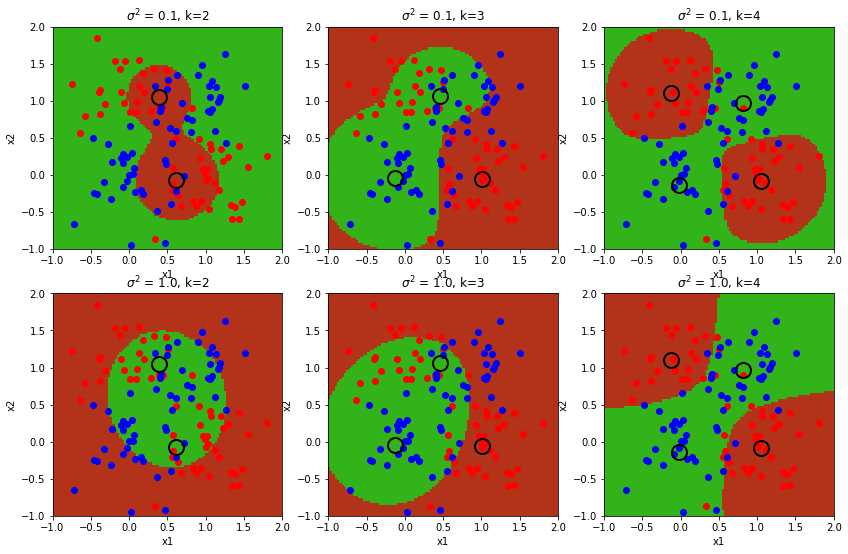

In [7]:
num_points = 100

plt.figure(figsize=(14, 9))

for subplot_y, variance in enumerate([0.1, 1.]):
    for subplot_x, k in enumerate([2, 3, 4]):

        xx, yy = np.meshgrid(np.linspace(-1, 2, num_points), np.linspace(-1, 2, num_points))
        pred_t = np.zeros((num_points, num_points))

        rbf = RBF(k, variance)

        for i in range(num_points):
            for j in range(num_points):
                pred_t[i, j] = rbf.predict([xx[i, j], yy[i, j]])
                
        plt.subplot(2, 3, 1 + subplot_y*3 + subplot_x)
        plt.title('$\sigma^2$ = {}, k={}'.format(variance, k))

        cmap = matplotlib.colors.LinearSegmentedColormap.from_list('rb', [(0.7, 0.2, 0.1),(0.2, 0.7, 0.1)], 2)
        plt.pcolor(xx, yy, pred_t, cmap=cmap)

        plt.scatter(train_x[:60, 0], train_x[:60, 1], c='r', label='t = -1')
        plt.scatter(train_x[60:, 0], train_x[60:, 1], c='b', label='t = 1')
        plt.plot(rbf.centers[:, 0], rbf.centers[:, 1], 'ko', markersize=15, markeredgewidth=2, mfc='none', label='predicted centers')
        plt.xlabel('x1')
        plt.ylabel('x2')

        plt.xlim(-1, 2)
        plt.ylim(-1, 2)

### H7.4b

In [16]:
import numpy
import numpy as np

class RBF:    
    def __init__(self, k=2, variance=0.45):

        cs = np.array([0,0,1,1]).reshape((2,2))
        self.centers = cs
        self.variance = variance
        self.k = k
        
        design_matrix = np.ones((k+1, 120))
        for j in range(k):
            for a in range(120):
                design_matrix[1+j, a] = np.exp(- np.sum((train_x[a] - self.centers[j])**2) / (2. * self.variance))

        self.w = np.linalg.pinv(design_matrix).T.dot(train_t)

    def predict(self, x):
        phi = np.ones((self.k+1, 1))
        for i in range(self.k):
            phi[1+i] = np.exp(- np.sum((x - self.centers[i])**2) / (2. * self.variance))

        return np.sign(self.w.T.dot(phi))[0]

(-1, 2)

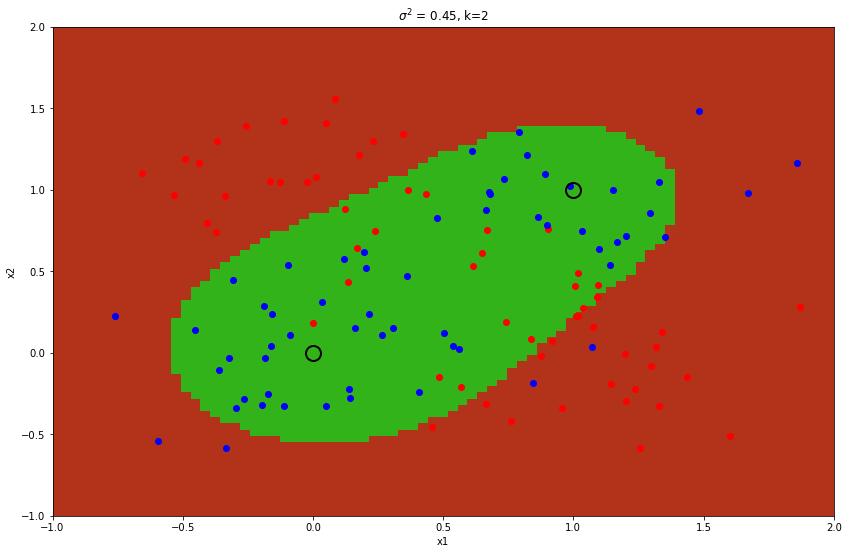

In [21]:
num_points = 80

plt.figure(figsize=(14, 9))

variance=0.45
k=2
xx, yy = np.meshgrid(np.linspace(-1, 2, num_points), np.linspace(-1, 2, num_points))
pred_t = np.zeros((num_points, num_points))

rbf = RBF(k, variance)

for i in range(num_points):
    for j in range(num_points):
        pred_t[i, j] = rbf.predict([xx[i, j], yy[i, j]])

plt.title('$\sigma^2$ = {}, k={}'.format(variance, k))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('rb', [(0.7, 0.2, 0.1),(0.2, 0.7, 0.1)], 2)
plt.pcolor(xx, yy, pred_t, cmap=cmap)

plt.scatter(train_x[:60, 0], train_x[:60, 1], c='r', label='t = -1')
plt.scatter(train_x[60:, 0], train_x[60:, 1], c='b', label='t = 1')
plt.plot(rbf.centers[:, 0], rbf.centers[:, 1], 'ko', markersize=15, markeredgewidth=2, mfc='none')
plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(-1, 2)
plt.ylim(-1, 2)

(-1, 2)

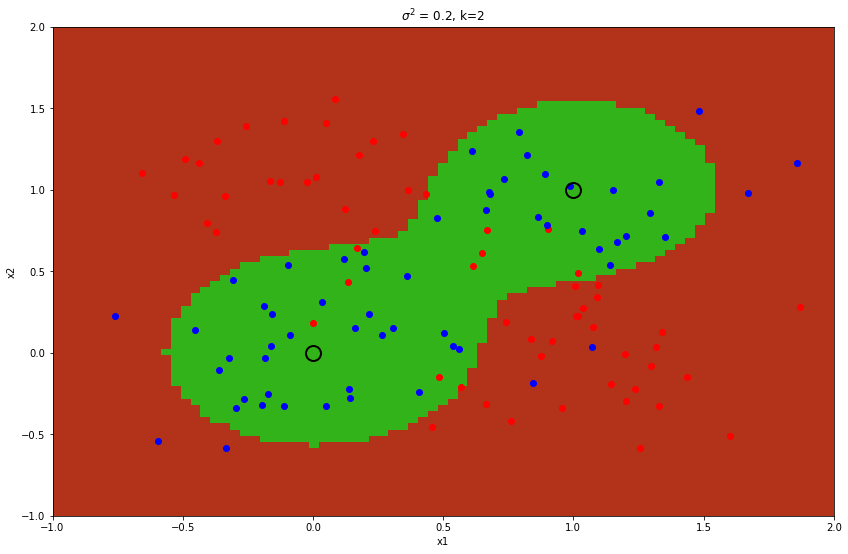

In [20]:
num_points = 80

plt.figure(figsize=(14, 9))

variance=0.2
k=2
xx, yy = np.meshgrid(np.linspace(-1, 2, num_points), np.linspace(-1, 2, num_points))
pred_t = np.zeros((num_points, num_points))

rbf = RBF(k, variance)

for i in range(num_points):
    for j in range(num_points):
        pred_t[i, j] = rbf.predict([xx[i, j], yy[i, j]])

plt.title('$\sigma^2$ = {}, k={}'.format(variance, k))

cmap = matplotlib.colors.LinearSegmentedColormap.from_list('rb', [(0.7, 0.2, 0.1),(0.2, 0.7, 0.1)], 2)
plt.pcolor(xx, yy, pred_t, cmap=cmap)

plt.scatter(train_x[:60, 0], train_x[:60, 1], c='r', label='t = -1')
plt.scatter(train_x[60:, 0], train_x[60:, 1], c='b', label='t = 1')
plt.plot(rbf.centers[:, 0], rbf.centers[:, 1], 'ko', markersize=15, markeredgewidth=2, mfc='none')
plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(-1, 2)
plt.ylim(-1, 2)